## Comparing DLC Camera CSV 3D coordinate Data to Autobender/Rotary Encoder

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from config import path_to_repository
from analysis import DLC3DBendAngles
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#load rotary encoder csv, camera 3d data form DLC csv, and flir_data.mat with timestamps from python camera acquisition

renc = os.path.join(path_to_repository , "CSV Data/8_20_25/data_rotenc_2025_08_20_18_37_05.csv")
df_renc = pd.read_csv(renc)  
cam = os.path.join(path_to_repository , "CSV Data/8_20_25/camera-1-2025_08_20_18_37_05DLC_Resnet50_0815Aug16shuffle1_snapshot_010.csv")
#cam = os.path.join(path_to_repository , "CSV Data/8_20_25/2025_08_20_18_37_05_DLC_3D.csv")
cam_timestamp = os.path.join(
    path_to_repository,
    "CSV Data/8_20_25/flir_data.mat"
)



In [5]:
#load DLC 3d coordinates from DLC triangulation
cam = DLC3DBendAngles(cam)

# Load only variables starting with 'ts' -> timestamp data
df_ts = cam.load_mat_as_df(cam_timestamp, prefix="ts")

In [6]:
#check number of rows from  cam dataframe (taken from DLC csv) and df_ts dataframe (timestamps form flir_data.mat file).  They hopefully are the same.  If not, need to determine which frames dropped.
rows_renc, rows_cam = DLC3DBendAngles.compare_row_counts(cam.df, df_ts)

DataFrame 1: 199 rows
DataFrame 2: 199 rows


In [7]:
#add camera timestamp columns to 3d dlc data
cam.add_dataframe(df_ts)

scorer DLC_Resnet50_0815Aug16shuffle1_snapshot_010             \
    bodyparts                                         PIP              
       coords                                           x          y   
0           0                                   307.73752  193.31961   
1           1                                   307.50560  192.59079   
2           2                                   308.78305  193.86148   
3           3                                   308.48132  194.70093   
4           4                                   308.92087  195.95807   
..        ...                                         ...        ...   
194       194                                   298.12952  179.40508   
195       195                                   297.68942  179.18030   
196       196                                   297.72340  177.35709   
197       197                                   298.82860  180.25078   
198       198                                   299.31534  180.12654   

                                                                       \
                      MCP                             hand              
    likelihood          x          y likelihood          x          y   
0     0.836859  775.40580  351.82690   0.890922  908.46075  411.82083   
1     0.857537  774.85205  351.46730   0.914274  907.62994  411.06310   
2     0.823181  776.88873  352.50070   0.857445  910.04517  412.62286   
3     0.766269  776.82050  352.48590   0.861685  910.23590  412.89320   
4     0.761887  776.97380  351.78076   0.862475  910.39860  413.50960   
..         ...        ...        ...        ...        ...        ...   
194   0.783905  762.90690  340.92920   0.885881  896.01340  403.86120   
195   0.780676  761.56290  340.37990   0.839201  894.78595  403.38690   
196   0.777392  762.33057  339.83698   0.857828  895.57336  402.31506   
197   0.793611  763.03217  342.71356   0.906831  896.37170  404.88562   
198   0.806837  763.98486  342.87277   0.903226  897.40436  404.60867   

                                                                        \
               radius_styloid_process                          forearm   
    likelihood                      x          y likelihood          x   
0     0.786659              1422.0767  528.49490   0.886087  1760.4255   
1     0.784603              1421.4254  527.12940   0.828146  1759.0024   
2     0.730298              1423.5002  528.41000   0.878758  1760.9685   
3     0.728408              1423.5881  528.49570   0.868690  1762.2528   
4     0.723267              1423.8651  529.03937   0.872673  1762.3766   
..         ...                    ...        ...        ...        ...   
194   0.809392              1410.4552  522.05023   0.829092  1752.4033   
195   0.806344              1409.5596  520.59870   0.830405  1749.4560   
196   0.783847              1410.4315  520.34620   0.821606  1751.6792   
197   0.804564              1410.5778  523.64453   0.845422  1751.9343   
198   0.815250              1411.7478  524.63460   0.854348  1752.9735   

                            ts_25183199   ts_25185174  
                                                       
             y likelihood                              
0    650.05280   0.874214  183711125116  183711132531  
1    646.94904   0.882305  183711173552  183711184545  
2    647.77710   0.841051  183711226773  183711236200  
3    649.04456   0.828862  183711277172  183711286935  
4    649.62946   0.842453  183711324910  183711332506  
..         ...        ...           ...           ...  
194  645.81720   0.878000  183720904685  183720914406  
195  643.56854   0.888720  183720951743  183720959919  
196  644.37024   0.871992  183721012779  183721020263  
197  647.10614   0.856070  183721052240  183721059501  
198  648.18964   0.845413  183721105458  183721112448  

[199 rows x 18 columns]

In [8]:
# Drop all rows where likelihood is less than threshold

# --- define the likelihood columns you care about ---
#likelihood_cols = [
#    ("DLC_Resnet50_0815Aug16shuffle1_snapshot_010", "PIP", "likelihood"),
#    ("DLC_Resnet50_0815Aug16shuffle1_snapshot_010", "MCP", "likelihood"),
#    ("DLC_Resnet50_0815Aug16shuffle1_snapshot_010", "hand", "likelihood"),
#]

# --- apply filter: keep rows where ALL ≥ 0.82 ---
#mask = (cam.df[likelihood_cols] >= 0.7).all(axis=1)
#cam.df = cam.df[mask].copy()

## Bend Angle obtained from Dot Product Formula

## $\theta = \cos^{-1} \left( \frac{\mathbf{v}_1 \cdot \mathbf{v}_2}{\|\mathbf{v}_1\| \, \|\mathbf{v}_2\|} \right)$

As an example:  

V1 is vector from hand to MCP (vector obtained from subtracting 2 xyz points from triangulated DLC csv data)

V2 is vector from MCP to PIP (vector obtained from subtracting 2 xyz points from triangulated DLC csv data)


In [10]:
#Calculte bend angles from DLC 3d trianglulated data

# --- MCP bend ---
hand_pts = cam.get_points("hand")
mcp_pts  = cam.get_points("MCP")
pip_pts  = cam.get_points("PIP")

v1_mcp = cam.vector(hand_pts, mcp_pts)  # hand→MCP
v2_mcp = cam.vector(mcp_pts, pip_pts)   # MCP→PIP
#angles_mcp = cam.angle_from_vectors(v1_mcp, v2_mcp) # old way of calculting angle without projection onto wrist plane



# angles_mcp_in_wrist_plane now reflects MCP bend measured strictly within the wrist plane.
# Rows where the wrist plane is ill-defined (nearly collinear or zero vectors) are NaN (plane_ok == False).

# --- Wrist angle ---
forearm_pts = cam.get_points("forearm")
hand_pts = cam.get_points("hand")
mcp_pts = cam.get_points("MCP")

v1_wrist = cam.vector(forearm_pts, hand_pts)  # forearm→hand
v2_wrist = cam.vector(hand_pts, mcp_pts)      # hand→MCP
angles_wrist = cam.angle_from_vectors(v1_wrist, v2_wrist)

# --- MCP bend, but constrained to the wrist plane ---
angles_mcp, v1_mcp_proj, v2_mcp_proj, plane_ok = cam.angle_from_vectors_in_plane(
    v1=v1_mcp,
    v2=v2_mcp,
    plane_v1=v1_wrist,
    plane_v2=v2_wrist,
    signed=True  # set False if you prefer 0–180°
)

# --- Add both angles to a copy of the DataFrame ---
df_out = cam.df.copy()
df_out[("metric", "mcp_bend_deg", "deg")]   = angles_mcp
df_out[("metric", "wrist_bend_deg", "deg")] = angles_wrist

cam.add_dataframe(df_out)



scorer DLC_Resnet50_0815Aug16shuffle1_snapshot_010             \
    bodyparts                                         PIP              
       coords                                           x          y   
0           0                                   307.73752  193.31961   
1           1                                   307.50560  192.59079   
2           2                                   308.78305  193.86148   
3           3                                   308.48132  194.70093   
4           4                                   308.92087  195.95807   
..        ...                                         ...        ...   
194       194                                   298.12952  179.40508   
195       195                                   297.68942  179.18030   
196       196                                   297.72340  177.35709   
197       197                                   298.82860  180.25078   
198       198                                   299.31534  180.12654   

                                                                       \
                      MCP                             hand              
    likelihood          x          y likelihood          x          y   
0     0.836859  775.40580  351.82690   0.890922  908.46075  411.82083   
1     0.857537  774.85205  351.46730   0.914274  907.62994  411.06310   
2     0.823181  776.88873  352.50070   0.857445  910.04517  412.62286   
3     0.766269  776.82050  352.48590   0.861685  910.23590  412.89320   
4     0.761887  776.97380  351.78076   0.862475  910.39860  413.50960   
..         ...        ...        ...        ...        ...        ...   
194   0.783905  762.90690  340.92920   0.885881  896.01340  403.86120   
195   0.780676  761.56290  340.37990   0.839201  894.78595  403.38690   
196   0.777392  762.33057  339.83698   0.857828  895.57336  402.31506   
197   0.793611  763.03217  342.71356   0.906831  896.37170  404.88562   
198   0.806837  763.98486  342.87277   0.903226  897.40436  404.60867   

                                                                        \
               radius_styloid_process                          forearm   
    likelihood                      x          y likelihood          x   
0     0.786659              1422.0767  528.49490   0.886087  1760.4255   
1     0.784603              1421.4254  527.12940   0.828146  1759.0024   
2     0.730298              1423.5002  528.41000   0.878758  1760.9685   
3     0.728408              1423.5881  528.49570   0.868690  1762.2528   
4     0.723267              1423.8651  529.03937   0.872673  1762.3766   
..         ...                    ...        ...        ...        ...   
194   0.809392              1410.4552  522.05023   0.829092  1752.4033   
195   0.806344              1409.5596  520.59870   0.830405  1749.4560   
196   0.783847              1410.4315  520.34620   0.821606  1751.6792   
197   0.804564              1410.5778  523.64453   0.845422  1751.9343   
198   0.815250              1411.7478  524.63460   0.854348  1752.9735   

                            ts_25183199   ts_25185174       metric  \
                                                      mcp_bend_deg   
             y likelihood                                      deg   
0    650.05280   0.874214  183711125116  183711132531    -5.547303   
1    646.94904   0.882305  183711173552  183711184545    -5.396674   
2    647.77710   0.841051  183711226773  183711236200    -5.578578   
3    649.04456   0.828862  183711277172  183711286935    -5.741044   
4    649.62946   0.842453  183711324910  183711332506    -6.414102   
..         ...        ...           ...           ...          ...   
194  645.81720   0.878000  183720904685  183720914406    -6.140642   
195  643.56854   0.888720  183720951743  183720959919    -6.148780   
196  644.37024   0.871992  183721012779  183721020263    -5.846595   
197  647.10614   0.856070  183721052240  183721059501    -5.709055   
198  648.18964   0.845413  1

In [11]:
# Count how many NAN's in MCP Bend Angle ->  max should be size of number of timestamps from camera data 

col_name = ("metric", "mcp_bend_deg", "deg")  # tuple key in MultiIndex

# Count NaNs
num_nans = cam.df[col_name].isna().sum()

# Count total rows
total_rows = len(cam.df)

# Print results
print(f"NaNs in MCP bend angle: {num_nans} / {total_rows} rows")
print(f"Percent missing: {100 * num_nans / total_rows:.2f}%")

NaNs in MCP bend angle: 0 / 199 rows
Percent missing: 0.00%


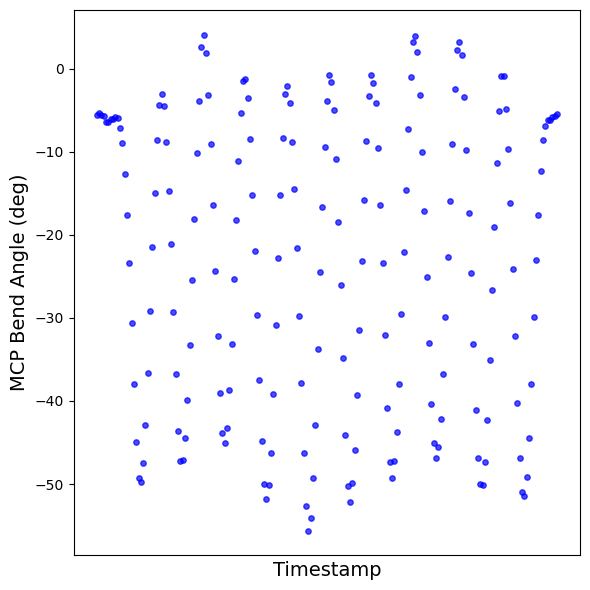

In [12]:
# Plot MCP Bend Angles Calculated from Camera Data vs Camera Timestamp
plt.figure(figsize=(6,6))
plt.scatter(
    cam.df[("ts_25183199", "", "")], 
    cam.df[("metric", "mcp_bend_deg", "deg")],
    s=15, alpha=0.7, color="blue"  # set dots to blue
)

plt.xlabel("Timestamp", fontsize=14)  # bigger label font
plt.ylabel("MCP Bend Angle (deg)", fontsize=14)

# Remove x ticks completely
plt.xticks([])

plt.tight_layout()
plt.savefig("MCP Bend vs timestamp.png", dpi=300, bbox_inches='tight')
plt.show()


In [13]:
cam.df[("ts_25183199", "", "")]

0      183711125116
1      183711173552
2      183711226773
3      183711277172
4      183711324910
           ...     
194    183720904685
195    183720951743
196    183721012779
197    183721052240
198    183721105458
Name: (ts_25183199, , ), Length: 199, dtype: object

In [14]:
df_renc["timestamp"]

0      183711116203
1      183711140863
2      183711163313
3      183711188072
4      183711212366
           ...     
435    183721011690
436    183721033034
437    183721057496
438    183721079570
439    183721103034
Name: timestamp, Length: 440, dtype: int64

## Align Timestamps 

In [16]:
cam.find_matching_indices(
    encoder_df=df_renc,
    cam_time_col=("ts_25183199", "", ""),  # or "ts_25183199"
    enc_time_col="timestamp",

    #--------------- set a timestamp difference threshold here ------------------
    
    tolerance="10ms",     # <-- was 10000; use an explicit window for clarity

    #--------------- set a timestamp difference threshold here ------------------
    
    direction="nearest",
)

cam.attach_encoder_using_match(
    encoder_df=df_renc,
    columns=None,
    suffix="_renc",
    keep_time_delta=True,
    drop_unmatched=True,
)


[find_matching_indices] Dropping 0 camera rows with NaT timestamps.
[find_matching_indices] Dropping 0 encoder rows with NaT timestamps.
[debug] cam range: 0 days 18:37:11.125116 → 0 days 18:37:21.105458
[debug] enc range: 0 days 18:37:11.116203 → 0 days 18:37:21.103034
[debug] probe |delta| (ms) stats: count    23.000000
mean      4.946000
std       3.618171
min       0.349000
25%       1.964000
50%       3.287000
75%       8.547000
max      11.453000
Name: delta_ms, dtype: float64


C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:434: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  cam_small["_t_cam_ns"] = cam_small["t_cam_td"].view("i8")
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:435: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  enc_small["_t_enc_ns"] = enc_small["t_enc_td"].view("i8")


,"(scorer, bodyparts, coords)","(DLC_Resnet50_0815Aug16shuffle1_snapshot_010, PIP, x)","(DLC_Resnet50_0815Aug16shuffle1_snapshot_010, PIP, y)","(DLC_Resnet50_0815Aug16shuffle1_snapshot_010, PIP, likelihood)","(DLC_Resnet50_0815Aug16shuffle1_snapshot_010, MCP, x)","(DLC_Resnet50_0815Aug16shuffle1_snapshot_010, MCP, y)","(DLC_Resnet50_0815Aug16shuffle1_snapshot_010, MCP, likelihood)","(DLC_Resnet50_0815Aug16shuffle1_snapshot_010, hand, x)","(DLC_Resnet50_0815Aug16shuffle1_snapshot_010, hand, y)","(DLC_Resnet50_0815Aug16shuffle1_snapshot_010, hand, likelihood)",...,"(DLC_Resnet50_0815Aug16shuffle1_snapshot_010, forearm, likelihood)","(ts_25183199, , )","(ts_25185174, , )","(metric, mcp_bend_deg, deg)","(metric, wrist_bend_deg, deg)",timestamp_renc,raw_renc,volts_renc,angle_renc,time_delta_renc
0,0,307.73752,193.31961,0.836859,775.40580,351.82690,0.890922,908.46075,411.82083,0.786659,...,0.874214,183711125116,183711132531,-5.547303,8.648014,183711116203,14684,2.753250,2.635825,-8.913
3,3,308.48132,194.70093,0.766269,776.82050,352.48590,0.861685,910.23590,412.89320,0.728408,...,0.828862,183711277172,183711286935,-5.741044,8.868237,183711281814,14717,2.759438,3.016796,4.642
4,4,308.92087,195.95807,0.761887,776.97380,351.78076,0.862475,910.39860,413.50960,0.723267,...,0.842453,183711324910,183711332506,-6.414102,9.337222,183711327690,14699,2.756063,2.808993,2.780
5,5,308.92280,195.78296,0.770666,776.94600,351.35486,0.865448,910.50600,413.03473,0.718646,...,0.837985,183711377823,183711388321,-6.401235,9.305811,183711372688,14709,2.757938,2.924439,-5.135
6,6,308.50656,196.60135,0.757358,776.78810,352.89334,0.844266,910.17725,413.84650,0.726294,...,0.836738,183711428389,183711439086,-6.101617,9.099957,183711418650,14687,2.753812,2.670458,-9.739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,193,292.46063,180.18347,0.784241,760.79785,338.23212,0.845629,894.39075,402.14865,0.769544,...,0.899325,183720851060,183720859626,-6.920564,9.765439,183720851238,14657,2.748187,2.324120,0.178
194,194,298.12952,179.40508,0.783905,762.90690,340.92920,0.885881,896.01340,403.86120,0.809392,...,0.878000,183720904685,183720914406,-6.140642,9.527932,183720895353,14700,2.756250,2.820538,-9.332
196,196,297.72340,177.35709,0.777392,762.33057,339.83698,0.857828,895.57336,402.31506,0.783847,...,0.871992,183721012779,183721020263,-5.846595,9.334361,183721011690,14728,2.761500,3.143787,-1.089
197,197,298.82860,180.25078,0.793611,763.03217,342.71356,0.906831,896.37170,404.88562,0.804564,...,0.856070,183721052240,183721059501,-5.709055,9.190686,183721057496,14710,2.758125,2.935984,5.256


In [17]:
# Create a smaller dataframe keeping only columns for following:

cols_to_keep = [
    "angle_renc",   
    ("metric", "mcp_bend_deg", "deg"),
    ("metric", "wrist_bend_deg", "deg"),
    "time_delta_renc",  # time difference between camera and rot enc timestamps
]
small_df = cam.df[cols_to_keep].copy()
small_df = small_df.dropna(subset=[("metric", "mcp_bend_deg", "deg")])
small_df = small_df.loc[:, ~small_df.columns.duplicated()].copy()


In [18]:
# Count how many remaining datapoints left  in MCP Bend Angle  after NaN removal from timestamped matched dataframe 

# Count NaNs
remain = len(small_df)

# Count total rows
total_rows = len(cam.df)

# Print results
print(f"Rows after timestamp matching: {total_rows} rows")
print(f"Rows after dropping NaN's in MCP Bend Angle: {remain} rows")

Rows after timestamp matching: 177 rows
Rows after dropping NaN's in MCP Bend Angle: 177 rows


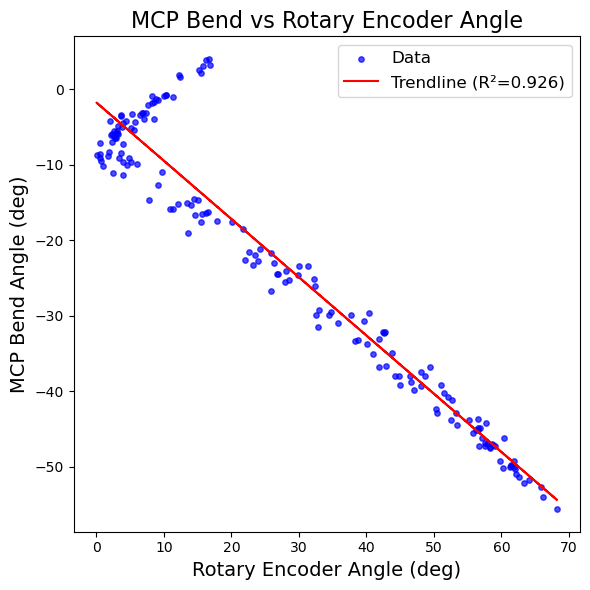

In [19]:
x = small_df["angle_renc"].to_numpy()
y = small_df[("metric", "mcp_bend_deg", "deg")].to_numpy()

# in-place (no extra array)
np.abs(x, out=x)

# Fit linear regression (y = m*x + b)
m, b = np.polyfit(x, y, 1)
y_pred = m * x + b

# Compute R²
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(x, y, s=15, alpha=0.7, color="blue", label="Data")  # blue dots
plt.plot(x, y_pred, color="red", label=f"Trendline (R²={r2:.3f})")

plt.xlabel("Rotary Encoder Angle (deg)", fontsize=14)  # bigger labels
plt.ylabel("MCP Bend Angle (deg)", fontsize=14)
plt.title("MCP Bend vs Rotary Encoder Angle", fontsize=16)

plt.grid(False)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig("MCP Bend vs rot enc.png", dpi=300, bbox_inches='tight')
plt.show()


## This code is calculating abs error between camera calculated mcp bend angle (pred) and encoder angle (true).  This is not taking into account angles where plate is bend up.  Also, i am including all timestamp matched data, even where likelihood column showed values of ~ 0.7. 

In [21]:
small_df

,angle_renc,"(metric, mcp_bend_deg, deg)","(metric, wrist_bend_deg, deg)",time_delta_renc
0,2.635825,-5.547303,8.648014,-8.913
3,3.016796,-5.741044,8.868237,4.642
4,2.808993,-6.414102,9.337222,2.780
5,2.924439,-6.401235,9.305811,-5.135
6,2.670458,-6.101617,9.099957,-9.739
...,...,...,...,...
193,2.324120,-6.920564,9.765439,0.178
194,2.820538,-6.140642,9.527932,-9.332
196,3.143787,-5.846595,9.334361,-1.089
197,2.935984,-5.709055,9.190686,5.256


C:\Users\toppe\AppData\Local\Temp\ipykernel_29736\350477242.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


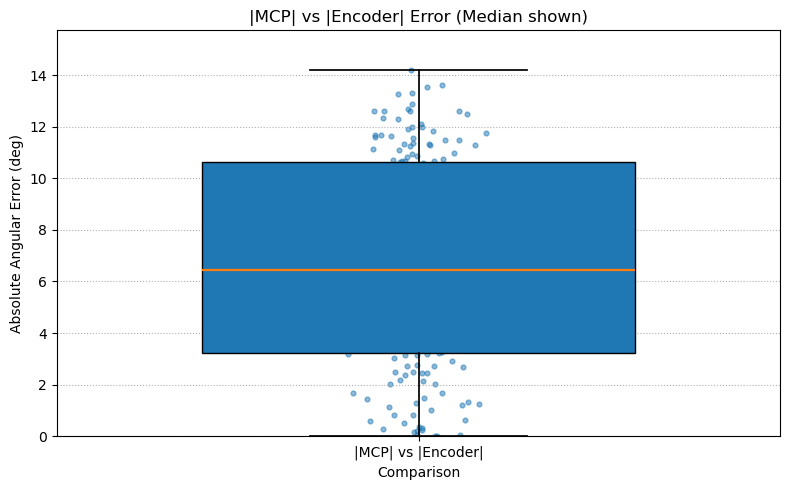

In [22]:
# --- columns in small_df ---
mcp_angle_col = ("metric", "mcp_bend_deg", "deg")   # adjust if needed
enc_angle_col = "angle_renc"
time_col      = "timestamp"  # optional

# --- pull numeric columns ---
mcp = pd.to_numeric(small_df[mcp_angle_col], errors="coerce")
enc = pd.to_numeric(small_df[enc_angle_col], errors="coerce")

# --- drop rows with NaN in either ---
mask = mcp.notna() & enc.notna()
mcp = mcp[mask]
enc = enc[mask]
ts  = small_df.loc[mask, time_col] if time_col in small_df.columns else None

# --- OPTIONAL: drop rows where encoder is negative ---
mask_pos = enc >= 0
mcp = mcp[mask_pos]
enc = enc[mask_pos]
ts  = ts[mask_pos] if ts is not None else None

# --- absolute values for both series ---
mcp_abs = np.abs(mcp.to_numpy())
enc_abs = np.abs(enc.to_numpy())
ts_arr  = ts.to_numpy() if ts is not None else None

# --- absolute error (true = |encoder|, exp = |MCP|) ---
aerr = np.abs(mcp_abs - enc_abs)

# --- tidy DataFrame (keeps your original column labels) ---
df_err = pd.DataFrame({
    enc_angle_col: enc_abs,
    mcp_angle_col: mcp_abs,
    "abs_error_deg": aerr
})
if ts_arr is not None:
    df_err[time_col] = ts_arr

# --- box plot: median shown (default), mean hidden ---
fig, ax = plt.subplots(figsize=(8, 5))
bp = ax.boxplot(
    [aerr],
    labels=["|MCP| vs |Encoder|"],
    patch_artist=True,
    showfliers=False,
    showmeans=False,
    widths=0.6
)

# simple styling (optional)
for med in bp["medians"]:
    med.set_linewidth(1.6)
for w in bp["whiskers"]:
    w.set_linewidth(1.25)
for cap in bp["caps"]:
    cap.set_linewidth(1.25)

# jittered points (optional)
x = np.random.normal(loc=1, scale=0.04, size=aerr.size)
ax.scatter(x, aerr, s=12, alpha=0.5)

# axes/limits
ax.set_xlabel("Comparison")
ax.set_ylabel("Absolute Angular Error (deg)")
if aerr.size:
    ymax = np.nanpercentile(aerr, 97.5) * 1.2
    ax.set_ylim(0, max(15, ymax))
ax.set_title("|MCP| vs |Encoder| Error (Median shown)")
ax.grid(True, axis="y", linestyle=":", linewidth=0.8)
plt.tight_layout()
plt.show()
